In [78]:
# Install Dependencies

%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install mlflow
%pip install seaborn
%pip install mlxtend
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


%matplotlib inline

# **Auswahl Datensatz**

Hier wurde der Datensatz "Diabetes" ausgewählt.

In [80]:
#Import Dataset
dataset = "https://raw.githubusercontent.com/rakaputra12/Data_Exploration_Diabetes/main/Healthcare-Diabetes.csv"
diabetes_df = pd.read_csv(dataset)

In [81]:
diabetes_df.head()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [82]:
#Delete the column "Id"
diabetes_df = diabetes_df.drop('Id', axis=1)

# **Charakterisierung des Datensatzes**

In [83]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [84]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [85]:
diabetes_df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2768.000000  2768.000000    2768.000000    2768.000000  2768.000000   
mean      3.742775   121.102601      69.134393      20.824422    80.127890   
std       3.323801    32.036508      19.231438      16.059596   112.301933   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      62.000000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    37.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2768.000000               2768.000000  2768.000000  2768.000000  
mean     32.137392                  0.471193    33.132225     0.343931  
std       8.076127                  0.325669    11.777230     0.475104  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.300000                  0.244000    24.000000     0.000000  
50%      32.200000                  0.375000    29.000000     0.000000  
75%      36.625000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [86]:
diabetes_df.describe().T

count        mean         std     min     25%  \
Pregnancies               2768.0    3.742775    3.323801   0.000   1.000   
Glucose                   2768.0  121.102601   32.036508   0.000  99.000   
BloodPressure             2768.0   69.134393   19.231438   0.000  62.000   
SkinThickness             2768.0   20.824422   16.059596   0.000   0.000   
Insulin                   2768.0   80.127890  112.301933   0.000   0.000   
BMI                       2768.0   32.137392    8.076127   0.000  27.300   
DiabetesPedigreeFunction  2768.0    0.471193    0.325669   0.078   0.244   
Age                       2768.0   33.132225   11.777230  21.000  24.000   
Outcome                   2768.0    0.343931    0.475104   0.000   0.000   

                              50%      75%     max  
Pregnancies                 3.000    6.000   17.00  
Glucose                   117.000  141.000  199.00  
BloodPressure              72.000   80.000  122.00  
SkinThickness              23.000   32.000  110.00  
Insulin                    37.000  130.000  846.00  
BMI                        32.200   36.625   80.60  
DiabetesPedigreeFunction    0.375    0.624    2.42  
Age                        29.000   40.000   81.00  
Outcome                     0.000    1.000    1.00

In [87]:
diabetes_df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0           False    False          False          False    False  False   
1           False    False          False          False    False  False   
2           False    False          False          False    False  False   
3           False    False          False          False    False  False   
4           False    False          False          False    False  False   
...           ...      ...            ...            ...      ...    ...   
2763        False    False          False          False    False  False   
2764        False    False          False          False    False  False   
2765        False    False          False          False    False  False   
2766        False    False          False          False    False  False   
2767        False    False          False          False    False  False   

      DiabetesPedigreeFunction    Age  Outcome  
0                        False  False    False  
1                        False  False    False  
2                        False  False    False  
3                        False  False    False  
4                        False  False    False  
...                        ...    ...      ...  
2763                     False  False    False  
2764                     False  False    False  
2765                     False  False    False  
2766                     False  False    False  
2767                     False  False    False  

[2768 rows x 9 columns]

In [88]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [89]:
diabetes_df.duplicated().sum()

1990

1990 rows are Duplicate, have to be deleted

This make the dataset to small???

In [90]:
diabetes_df = diabetes_df.drop_duplicates()

In [91]:
diabetes_df.duplicated().sum()

0

Now Cleaned

In [92]:
zero_counts = (diabetes_df == 0).sum()

In [93]:
zero_counts

Pregnancies                 114
Glucose                       5
BloodPressure                36
SkinThickness               229
Insulin                     377
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     506
dtype: int64

On these columns, a value of zero does not make sense and thus indicates missing value

Following columns or variables have an invalid zero value: Glucose, BloodPressure, SkinThickness, Insulin, BMI: it is better to replace zeros with NaN since after that counting them would be easier and zeros need to be replaced with suitable values. On the column like Pregnancies, a value of zero does make sense, cause someone can have never been pregnant. For the column "Outcome" is because the value for sufferer or not is only differentiated by one or zero.

Or i can let the dataframe like this. so i dont have to handle missing data???

In [94]:
#Replace zeros with NaN Value
diabetes_df_new = diabetes_df.copy(deep = True)
diabetes_df_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.NaN)

#Showing the Count of NaNs
print(diabetes_df_new.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                36
SkinThickness               229
Insulin                     377
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [95]:
#Aiming to impute NaN values for the columns in accordance with their distribution
diabetes_df_new['Glucose'].fillna(diabetes_df_new['Glucose'].mean(), inplace=True)
diabetes_df_new['BloodPressure'].fillna(diabetes_df_new['BloodPressure'].mean(), inplace=True)
diabetes_df_new['SkinThickness'].fillna(diabetes_df_new['SkinThickness'].mean(), inplace=True)
diabetes_df_new['Insulin'].fillna(diabetes_df_new['Insulin'].mean(), inplace=True)
diabetes_df_new['BMI'].fillna(diabetes_df_new['BMI'].mean(), inplace=True)

/var/folders/4l/lbf6f7cx7pd9qfs2p1px1_x00000gn/T/ipykernel_63901/682525565.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_df_new['Glucose'].fillna(diabetes_df_new['Glucose'].mean(), inplace=True)
/var/folders/4l/lbf6f7cx7pd9qfs2p1px1_x00000gn/T/ipykernel_63901/682525565.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

Replacing zero values with NaN and then filling them with the distribution for each column is a reasonable approach to handling missing data, especially when zeros in those columns don't make sense and likely represent missing values rather than true measurements. This technique allows you to preserve the integrity of the data and capture the uncertainty associated with missing values.

Imputing missing values based on the distribution of non-missing values in the respective columns can help the model learn more accurate patterns and relationships within the data. By doing so, you're providing the model with more representative values rather than potentially biased zeros.

Nun ist der Datensatz bereit zu verarbeiten.

## **Perform EDA (Exploratory Data Analysis )**

Outcome
0    506
1    272
Name: count, dtype: int64


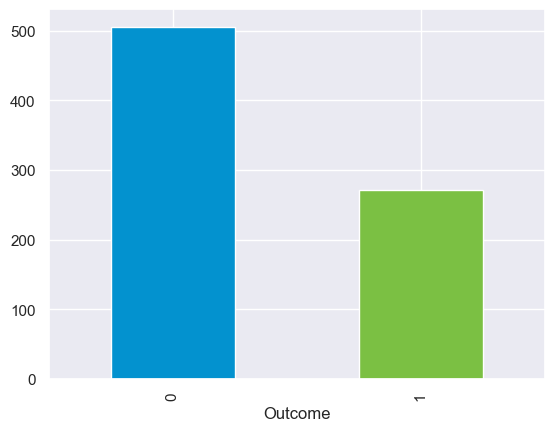

In [96]:
#Checking the balance of the data by plotting the count of outcomes by their values
colors = ['#0392cf', '#7bc043']

print(diabetes_df.Outcome.value_counts())
p = diabetes_df['Outcome'].value_counts().plot(kind="bar", color=colors)

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients.

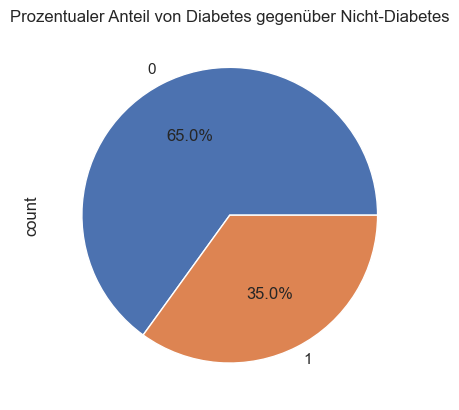

In [97]:
diabetes_df_new['Outcome'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Prozentualer Anteil von Diabetes gegenüber Nicht-Diabetes')
plt.show()

Is my statement above correct?? i don't think so :( or correct??? 35% diabet, 65% no diabets. YEAYY CORRECT!!!!!!!!!

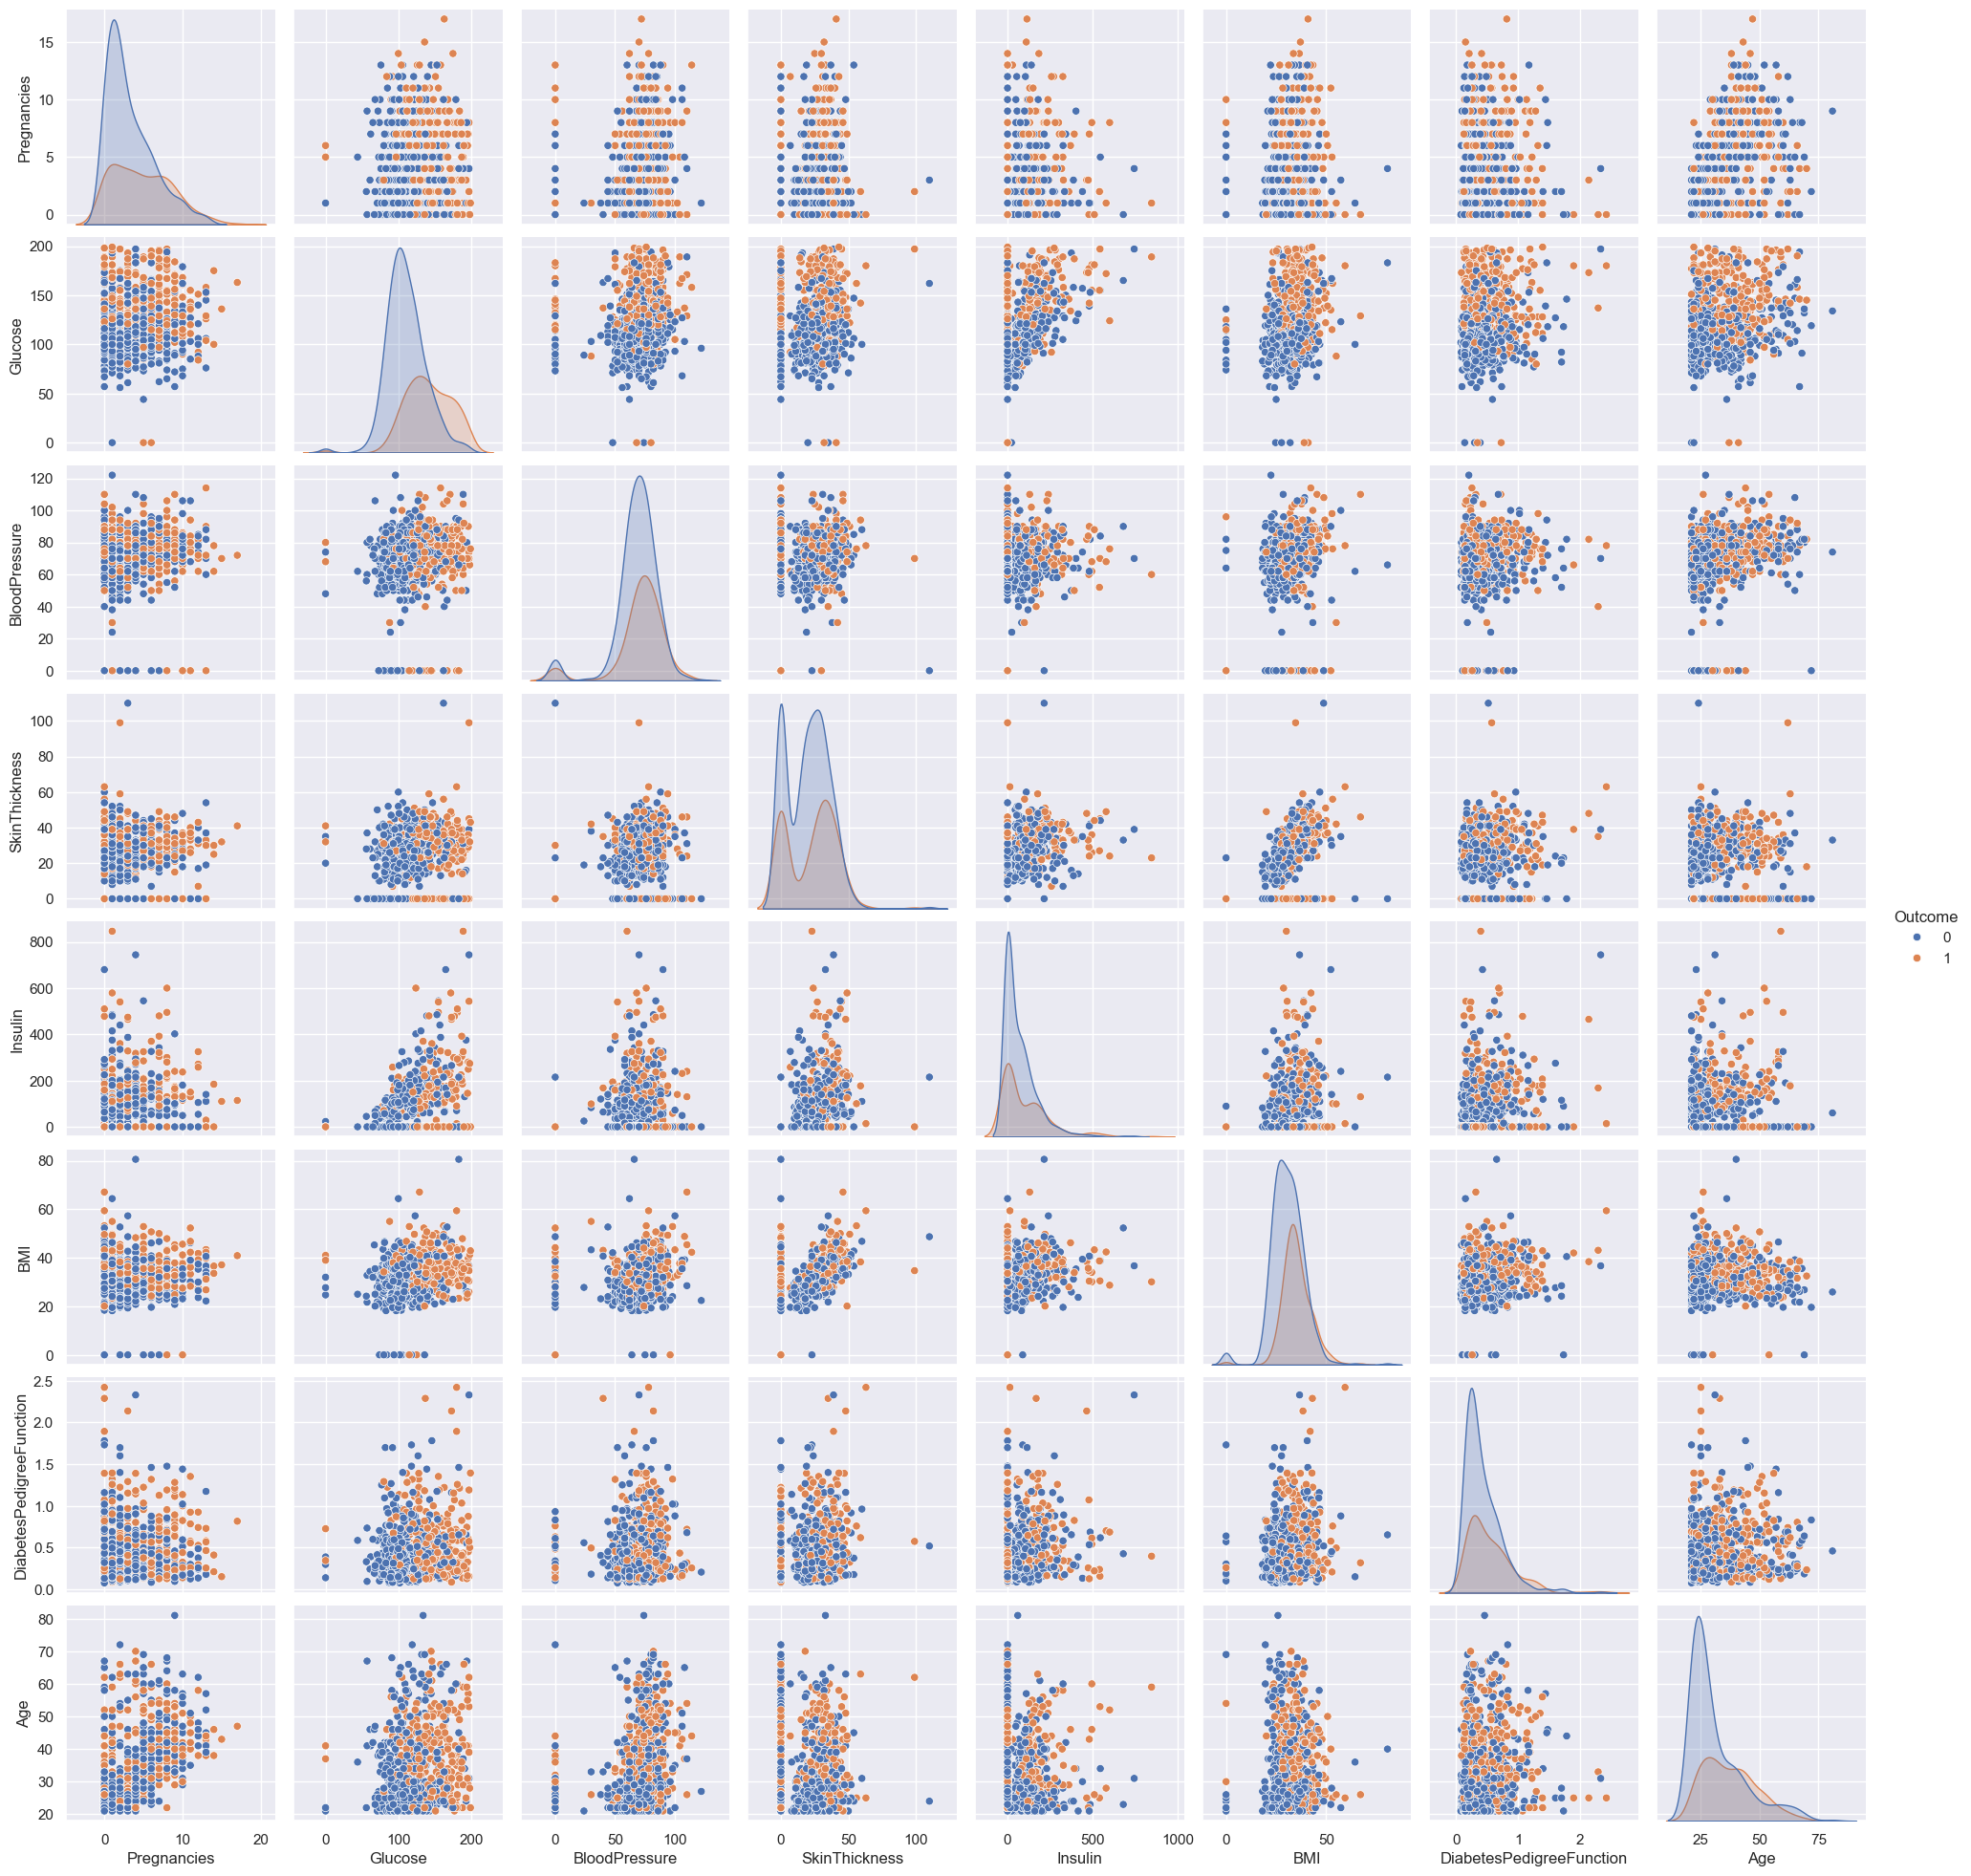

In [98]:
#Plotting the Pair Plots for the uncleaned data
p = sns.pairplot(diabetes_df, hue= 'Outcome')

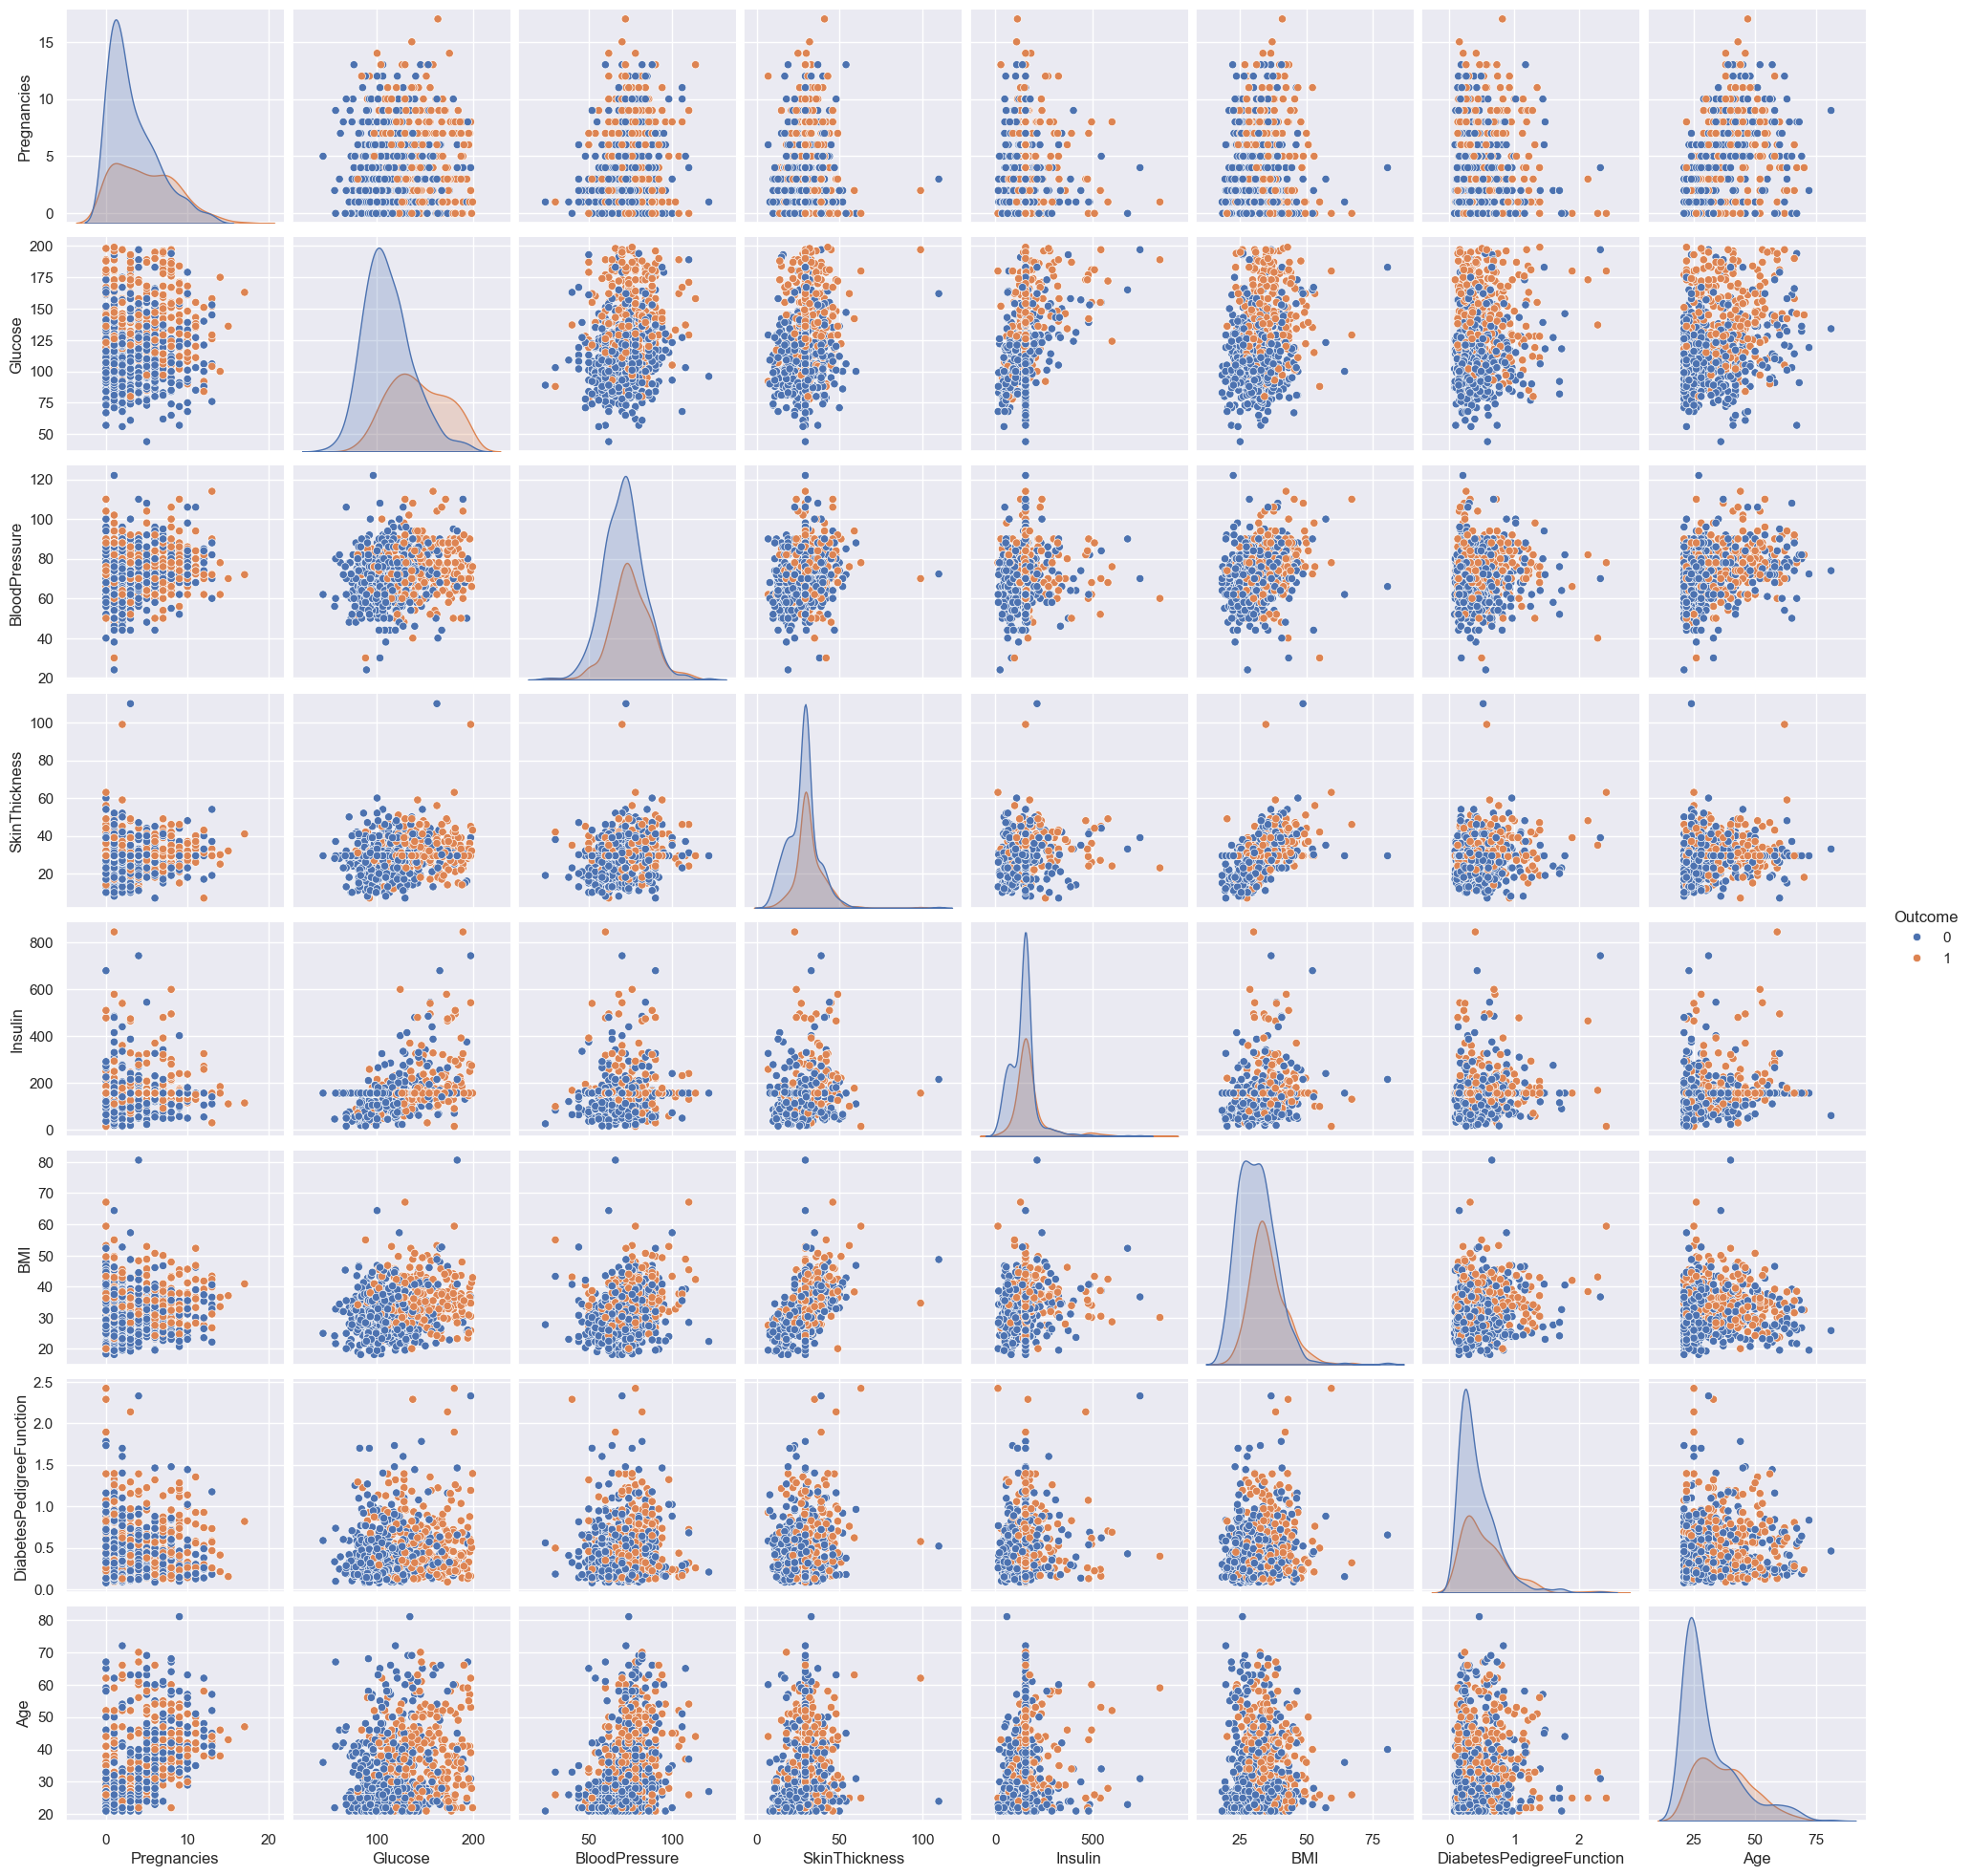

In [99]:
#Plotting the Pair Plots for the cleaned data
p = sns.pairplot(diabetes_df_new, hue= 'Outcome')

## **Correlation between all the features**

In [100]:
diabetes_df_new.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.123135       0.212595       0.071161   
Glucose                      0.123135  1.000000       0.206341       0.198692   
BloodPressure                0.212595  0.206341       1.000000       0.189485   
SkinThickness                0.071161  0.198692       0.189485       1.000000   
Insulin                      0.055158  0.417187       0.075614       0.161041   
BMI                          0.013979  0.241017       0.243765       0.505124   
DiabetesPedigreeFunction    -0.034159  0.137051       0.000904       0.098876   
Age                          0.532993  0.265345       0.323805       0.130162   
Outcome                      0.220380  0.484827       0.173043       0.204605   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.055158  0.013979                 -0.034159   
Glucose                   0.417187  0.241017                  0.137051   
BloodPressure             0.075614  0.243765                  0.000904   
SkinThickness             0.161041  0.505124                  0.098876   
Insulin                   1.000000  0.161692                  0.100944   
BMI                       0.161692  1.000000                  0.140219   
DiabetesPedigreeFunction  0.100944  0.140219                  1.000000   
Age                       0.138863  0.033238                  0.034839   
Outcome                   0.213440  0.277451                  0.172160   

                               Age   Outcome  
Pregnancies               0.532993  0.220380  
Glucose                   0.265345  0.484827  
BloodPressure             0.323805  0.173043  
SkinThickness             0.130162  0.204605  
Insulin                   0.138863  0.213440  
BMI                       0.033238  0.277451  
DiabetesPedigreeFunction  0.034839  0.172160  
Age                       1.000000  0.244260  
Outcome                   0.244260  1.000000

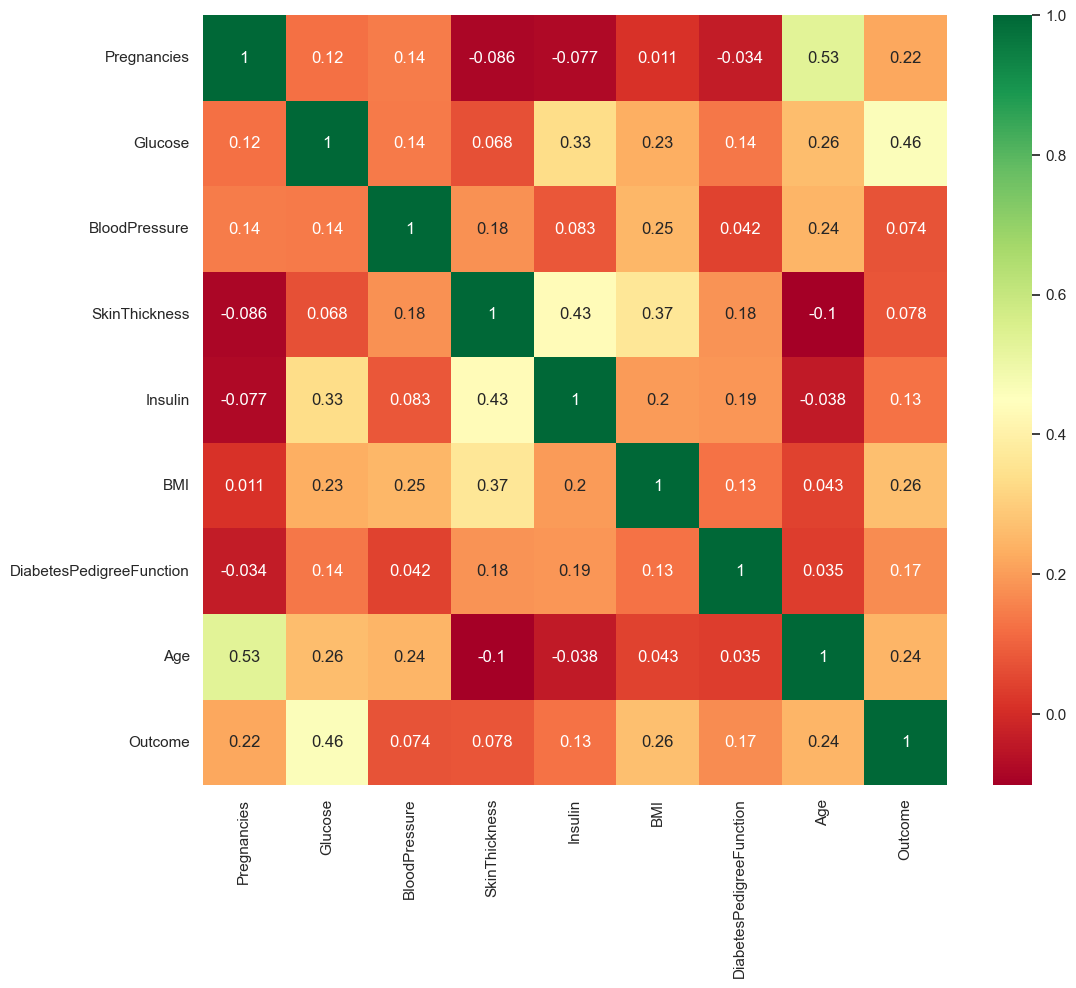

In [101]:
#Correlation between all the features before cleaning
plt.figure(figsize= (12,10))
p = sns.heatmap(diabetes_df.corr(), annot = True, cmap = 'RdYlGn')

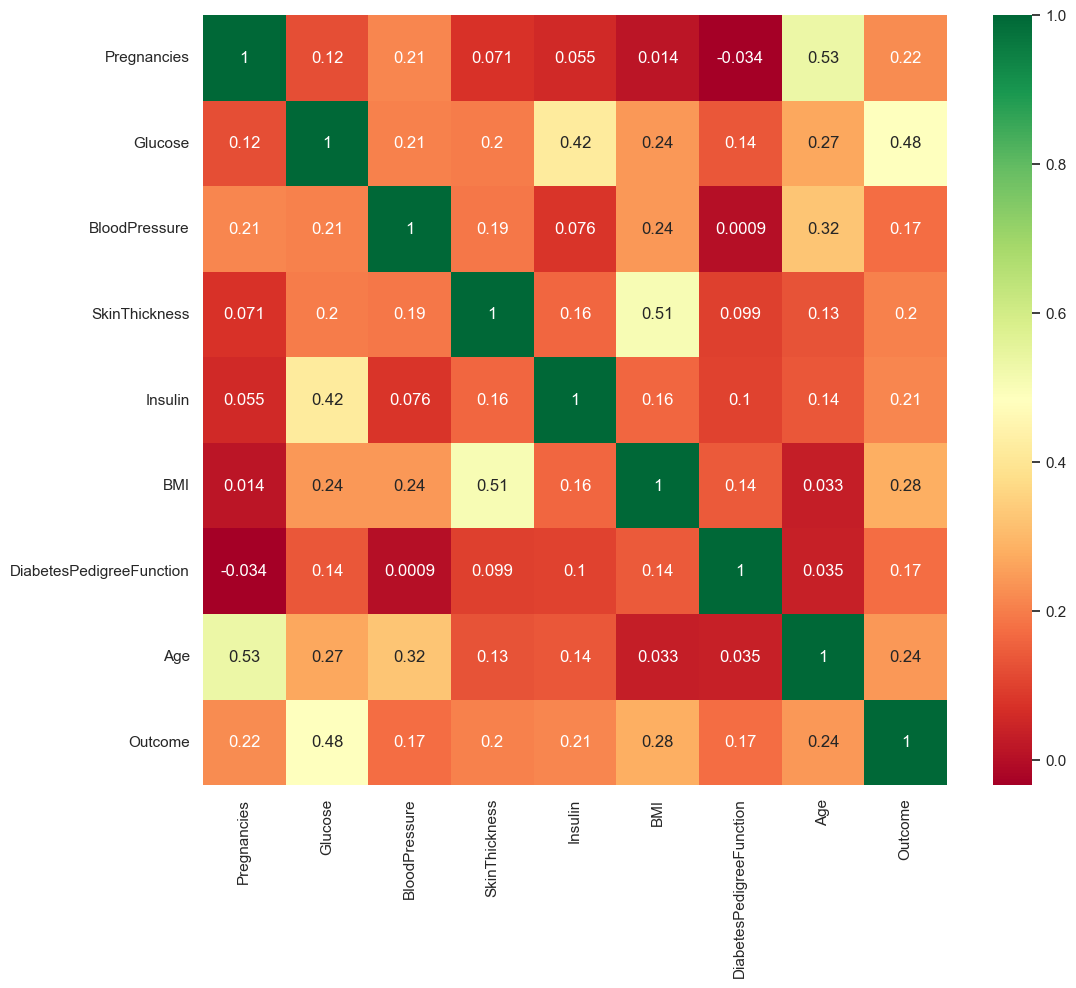

In [102]:
#Correlation between all the features after cleaning
plt.figure(figsize= (12,10))
p = sns.heatmap(diabetes_df_new.corr(), annot = True, cmap = 'RdYlGn')

HIER KANN MAN ERKENNEN, DASS DIE KORRELATION BETWENN FEATURES SICH ERHÖHEN, NACHDEM DER DATENSATZ BEREINIGHT WORDEN IST. Z.B GLUCOSE UND OUTCOME

BEFORE : 0.46 AFTER : 0.49

# **Feature Engineering**

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Hier kann ich auch mit Preprocessing data tun. also mit StandardScaler. See the previous Code in other Colab.

In [104]:
X=diabetes_df_new[diabetes_df_new.columns[0:-1]]
y=diabetes_df_new[diabetes_df_new.columns[-1]]

## **Split the dataset**

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

## **Ermittlung der Feature Importance mit einem Decision Tree**

In [106]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.791
Accuracy on test set: 0.718


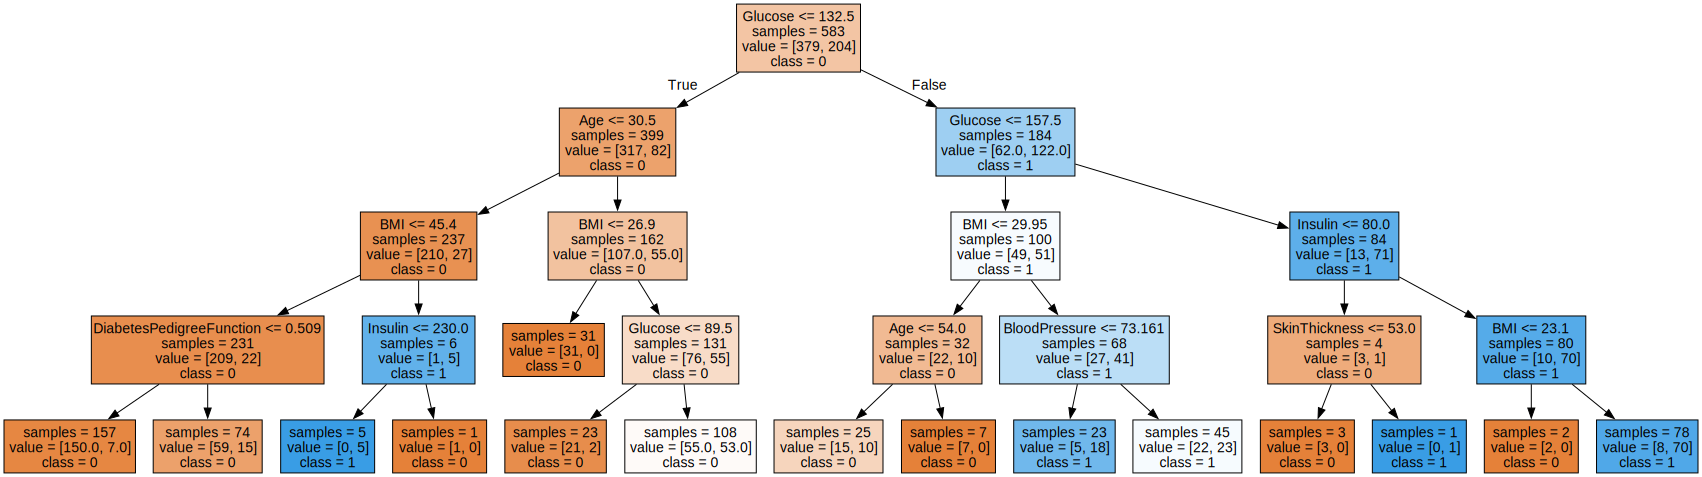

In [107]:
from sklearn.tree import export_graphviz
export_graphviz(tree,
                out_file="diabetes_tree.dot",
                class_names=["0","1"],
                feature_names=X.columns,
                impurity=False,
                filled=True)

import graphviz
with open("diabetes_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [108]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.60868234 0.0197465  0.01320043 0.04085847 0.19379673
 0.02213104 0.10158449]


In [109]:
df_feature_importance = pd.DataFrame({'Feature Names': X.columns, 'Importance of  Feature': tree.feature_importances_ })
df_feature_importance

Feature Names  Importance of  Feature
0               Pregnancies                0.000000
1                   Glucose                0.608682
2             BloodPressure                0.019747
3             SkinThickness                0.013200
4                   Insulin                0.040858
5                       BMI                0.193797
6  DiabetesPedigreeFunction                0.022131
7                       Age                0.101584

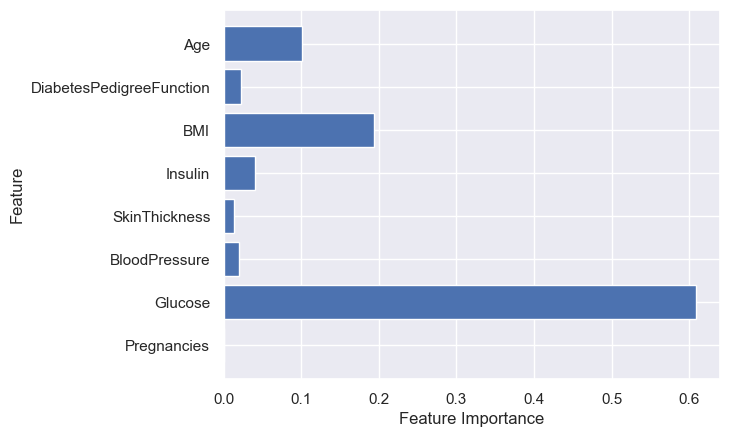

In [110]:
def plot_feature_importances_adult_census(model):
    n_features = X.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    ##plt.show()
    ##fig=plt.figure()
    plt.savefig("feature_imporatnace_diabetes.png")
    plt.show()
    plt.close()
plot_feature_importances_adult_census(tree)

Hier kann man erkennen, dass Feature "Glucose" und "BMI" Parameter sind, auf die geachtet werden müssen.

## **Ermittlung der Feature Importance mit einem Random  (Zum Vergleich)**

In [111]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [112]:
print(forest.feature_importances_)

[0.08019366 0.26025746 0.0844398  0.08109104 0.08437846 0.16017993
 0.12703382 0.12242583]


In [113]:
df_feature_importance_withRandomForest = pd.DataFrame({'Feature Names': X.columns, 'Importance of  Feature': forest.feature_importances_ })
df_feature_importance_withRandomForest

Feature Names  Importance of  Feature
0               Pregnancies                0.080194
1                   Glucose                0.260257
2             BloodPressure                0.084440
3             SkinThickness                0.081091
4                   Insulin                0.084378
5                       BMI                0.160180
6  DiabetesPedigreeFunction                0.127034
7                       Age                0.122426

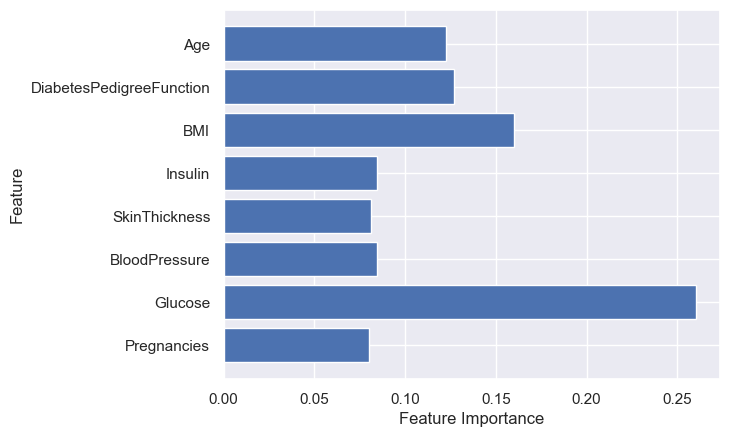

In [114]:
def plot_feature_importances_adult_census(model):
    n_features = X.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.savefig("feature_imporatnace_diabetes_forest.png")
    plt.show()
    plt.close()
plot_feature_importances_adult_census(forest)

# **Auswahl der Metriken**

When working with imbalanced datasets (which is often the case in medical datasets like diabetes prediction), metrics like precision, recall, and AUC-ROC become particularly important as they provide insights into the model's performance beyond simple accuracy.

Therefore, focusing on precision, recall, **F1 score**, and AUC-ROC will give you a more comprehensive understanding of your model's performance in this context.

If False Positives are Costly: Choose Precision. Precision measures the proportion of true positive predictions out of all positive predictions. If false positives are costly in your scenario (e.g., unnecessary treatments or interventions for individuals who don't have diabetes), then prioritize precision.

If False Negatives are Costly: Choose Recall. Recall measures the proportion of true positive predictions out of all actual positive instances. If missing positive cases (false negatives) is more critical in your context (e.g., failing to diagnose individuals who actually have diabetes), then prioritize recall.

If You Need a Balance: Choose the F1 Score. The F1 score is the harmonic mean of precision and recall, providing a balanced measure of both. It's useful when you want to balance the trade-off between false positives and false negatives.

So F1-Score is better???

# **Auswahl und Beschreibung der ML-Methode**

Methode that im gonna use is supervised learning.

A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. SVM is particularly well-suited for classification of complex datasets where there is clear margin of separation between classes.


To have even better result we decided to go for pipelining and used the Support Vector Machine algorithm.

The best score and parameter that we found were 0.75??? using Linear Kernel. The testing accuracy achieved was of 80.5%.???

## **Preparation Data**

Jetzt nehmen wir nur die alle Features für die Training, weil nur zwei is zu wenig???

In [162]:
X = diabetes_df_new.drop("Outcome", axis=1)
y = diabetes_df_new['Outcome']

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)
X = pd.DataFrame(scaler.fit_transform(X), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.648675  0.854466      -0.026492   5.995399e-01  0.000000  0.131449   
1    -0.840025 -1.214633      -0.519972  -4.563632e-02  0.000000 -0.834144   
2     1.244156  2.003965      -0.684465  -3.820210e-16  0.000000 -1.289352   
3    -0.840025 -1.083261      -0.519972  -6.908125e-01 -0.732374 -0.627231   
4    -1.137765  0.493195      -2.658384   5.995399e-01  0.142242  1.441897   

   DiabetesPedigreeFunction       Age  
0                  0.470164  1.413490  
1                 -0.366282 -0.199215  
2                  0.606541 -0.114336  
3                 -0.923912 -1.048008  
4                  5.503991 -0.029457

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# **Implementierung Training**

In [174]:
from sklearn.metrics import classification_report, accuracy_score

In [175]:
from sklearn import svm
machine = svm.SVC()
machine.fit(X_train,y_train)
y_pred = machine.predict(X_test)

clf_acc = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))
print("Accuracy SVM: {:.2f}%".format(clf_acc*100))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       176
           1       0.63      0.61      0.62        84

    accuracy                           0.76       260
   macro avg       0.72      0.72      0.72       260
weighted avg       0.76      0.76      0.76       260

Accuracy SVM: 75.77%


DELETE SOON

In [176]:
# After fitting the SVM model
params = machine.get_params()

# Print the parameters
print(params)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


# **Test Section**

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score


'''# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
'''


# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of the polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'coef0': [0.0, 0.1, 0.5],  # Independent term in kernel function
    'shrinking': [True, False],  # Whether to use the shrinking heuristic
    'probability': [True, False],  # Whether to enable probability estimates
    'tol': [0.0001, 0.001, 0.01],  # Tolerance for stopping criterion
}

# Define the classifier
svm = SVC()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, n_jobs=6, verbose=4, cv=5, scoring='accuracy', refit='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
best_estimator = grid_search.best_estimator_

# Use the best estimator to predict
y_pred_ = best_estimator.predict(X_test)

# Evaluate the model
clf_acc = accuracy_score(y_pred_, y_test)
print(classification_report(y_test, y_pred_))
print("Accuracy SVM after GridSearchCV: {:.2f}%".format(clf_acc*100))
print("Best Parameters:", best_params)


Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
[CV 1/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.0001;, score=0.731 total time=   0.1s
[CV 1/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.001;, score=0.731 total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.0001;, score=0.769 total time=   0.1s
[CV 3/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.0001;, score=0.798 total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.0001;, score=0.777 total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear, probability=True, shrinking=True, tol=0.001;, score=0.798 total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, 

In [152]:
print(grid_search.best_score_)
print(grid_search.best_params_)


0.7669161290322581
{'C': 1.0, 'coef0': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'probability': True, 'shrinking': True, 'tol': 0.0001}


In [ ]:
'''from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create GridSearchCV
grid_search = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', n_jobs=6, verbose=4, refit='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to predict
y_pred = best_estimator.predict(X_test)

# Evaluate the model
clf_acc = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))
print("Accuracy SVM after GridSearchCV: {:.2f}%".format(clf_acc*100))
print("Best Parameters:", best_params)
'''

# **Hyperparametertuning Verwendung ML Lifecycle Mgt im Code**

In dem Fall kommt Ml flow zum Einsatz

In [ ]:
%pip install mlflow
%pip install pyngrok

In [ ]:
from pyngrok import ngrok

ngrok.kill()

NGROK_AUTH_TOKEN = "2eMIaE6nA3kl4wBKRC2l5fiXQqj_2pbU9j8dNWagQCRKNtMNq"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr=5000, proto="http", bind_tls= True)
print("Mflow Tracking UI:", ngrok_tunnel.public_url)

Mflow Tracking UI: https://eea9-34-91-55-65.ngrok-free.app


In [ ]:
import mlflow
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
# Start an MLflow run
mlflow.start_run()

<ActiveRun: >

In [ ]:
#pipe_svc = Pipeline([('scl', StandardScaler()),('clf', SVC(random_state=0))])


#param_c = [0.001, 0.01, 0.1, 1.0, 5.0, 10.0]
#param_gamma = [10.0, 1.0, 0.1, 0.01, 0.001, 0.0001]

#Here with Pipeline
#Wenn gamma nur bis 1 maximal, dann best score 76% with test accuracy 0.762 in report 0.76,
#Wenn bis 10 dann 81% with test accuracy 0.818 in report 0.81 accuracy
#Wenn bis scale dann  0.77

#param_grid = [{'clf__C': param_c,'clf__kernel': ['linear']}, {'clf__C': param_c,'clf__gamma': param_gamma,'clf__kernel': ['rbf']}]
'''
parameters = {
    'C': [0.001, 0.01, 0.1, 1.0, 100.0, 1000.0], #[0.001, 0.01, 0.1, 1.0, 100.0]
    'gamma': ['scale', 1.0, 0.1, 0.01, 0.001],
    'kernel' : ['rbf'],
    'degree' : [2, 3, 4]}
'''


parameters = {
    'C': [0.5, 1.0, 10.0, 100.0],
    'gamma': ['scale', 1.0, 0.1, 0.01, 0.001],
    'kernel' : ['rbf','poly', 'sigmoid']}

gs = GridSearchCV(estimator = machine,
                  param_grid=parameters,
                  scoring='accuracy',
                  cv = 10,
                  n_jobs= -1,
                  refit ='accuracy')

# accuracy = f1/f1_micro here in sklearn
gs = gs.fit(X_train, y_train)


# Log parameters and metrics to MLflow
mlflow.log_metric("best_score", gs.best_score_)
# Log the best parameters as a parameter
for key, value in gs.best_params_.items():
    mlflow.log_param(f"best_{key}", value)

# Log the trained model
mlflow.sklearn.log_model(gs.best_estimator_, "svm_model")


#Takes so long!!!!!!!! try randomsearch


In [49]:
mlflow.end_run()

In [51]:
#print(gs.best_score_)
#print(gs.best_params_)

print(rs.best_score_)
print(rs.best_params_)

0.7458781362007169
{'kernel': 'rbf', 'gamma': 0.001, 'C': 100.0}


In [53]:
#clf = gs.best_estimator_
clf = rs.best_estimator_
#clf.fit(X_train, y_train) # Sonst Overfitting dann
y_pred_new = clf.predict(X_test)

# **Evaluation und Ergebnisdarstellung** | **Predict and Evaluate**

In [54]:
clf_acc_new = accuracy_score(y_pred_new, y_test)
print(classification_report(y_test, y_pred_new))
print("Accuracy SVM: {:.2f}%".format(clf_acc_new*100))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       106
           1       0.72      0.58      0.64        50

    accuracy                           0.79       156
   macro avg       0.77      0.74      0.75       156
weighted avg       0.79      0.79      0.79       156

Accuracy SVM: 79.49%


### **WHY WORSE THEN BEFORE???**

In [ ]:
!mlflow ui

# **Vorhersage-Demo | Testing**

Create a new data

In [ ]:
'''new_data = {
      'Pregnancies': [1],
      'Glucose': [85],
      'BloodPressure': [66],
      'SkinThickness': [29],
      'Insulin': [45],
       'BMI': [26.6],
      'DiabetesPedigreeFunction': [0.351],
      'Age': [27],

}'''

In [ ]:
new_data = pd.DataFrame(new_data)
new_data

Glucose   BMI
0      156  96.6

In [ ]:
scaled_new_data = scaler.transform(new_data)
y_pred_testing = clf.predict(scaled_new_data)

print("New Diagnose from new Data: ", y_pred_testing)

New Diagnose from new Data:  [1]
